## **Plant Disease Net**
In this tutorial, we will be classifying plant diseases from an image of a plant leaf.


*   We will be using a deep neural network with tensorflow
*   This is supervised learning, the [dataset](https://www.kaggle.com/vipoooool/new-plant-diseases-dataset) we will be using consists of 38 classes (plant followed by disease):
    *   Apple Scab
    *   Apple Black rot
    *   Apple Cedar apple rust
    *   Apple healthy
    *   Blueberry healthy
    *   Cherry (including sour) Powdery mildew
    *   Cherry (including sour) healthy
    *   Corn (maize) Cercospora leaf spot Gray spot
    *   Corn (maize) Common rust
    *   Corn (maize) Northern Leaf Blight
    *   Corn (maize) healthy
    *   Grape Black rot
    *   Grape Esca (Black Measles)
    *   Grape Leaf blight (Isariopsis Spot)
    *   Grape healthy
    *   Orange Haunglongbing (Citrus greening)
    *   Peach Bacterial spot
    *   Peach healthy
    *   Pepper, bell Bacterial spot
    *   Pepper, bell healthy
    *   Potato Early blight
    *   Potato Late blight
    *   Potato healthy
    *   Raspberry healthy
    *   Soybean healthy
    *   Squash Powdery mildew
    *   Strawberry Leaf scorch
    *   Strawberry healthy
    *   Tomato Bacterial spot
    *   Tomato Early blight
    *   Tomato Late blight
    *   Tomato Leaf Mold
    *   Tomato Septoria leaf spot
    *   Tomato Spider mites Two-spotted spider mite
    *   Tomato Target Spot
    *   Tomato Yellow Leaf Curl Virus
    *   Tomato mosaic virus
    *   Tomato healthy

## **Imports**
We first need to import needed packages:

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications.resnet50 import ResNet50,  preprocess_input, decode_predictions
import matplotlib.pylab as plt
import os, numpy as np

## **Downloading dataset**
The dataset from kaggle can be accessed from this drive [link](https://drive.google.com/file/d/1whurGLxtsM-Q1zqkDg9CuYWuVIFdluxA/view?usp=sharing). We will download the zip file, and unzip the data in our colab local storage.

In [3]:
#downlaod from google drive
!gdown --id 1whurGLxtsM-Q1zqkDg9CuYWuVIFdluxA
#unzip in current directory
!unzip -q plants.zip

Downloading...
From: https://drive.google.com/uc?id=1whurGLxtsM-Q1zqkDg9CuYWuVIFdluxA
To: /content/plants.zip
1.44GB [00:14, 101MB/s]


Next we will load the images in the folder into a tensorflow dataset.

In [4]:
path_train = os.path.join("New Plant Diseases Dataset(Augmented)", "train")
path_valid = os.path.join("New Plant Diseases Dataset(Augmented)", "valid")
#load images as tf dataset object
train = keras.preprocessing.image_dataset_from_directory(path_train)
valid = keras.preprocessing.image_dataset_from_directory(path_valid)
class_names = train.class_names

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


Lets take a look at one of our loaded images

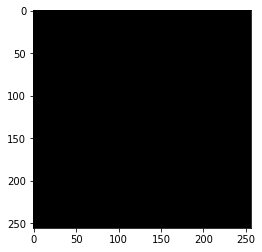

In [56]:
#get singal image from batch
image = list(train.take(1))[0][0][0]
#convert image to numpy arrau and display
plt.imshow(image.numpy().astype("uint8"))


## **Pre-Processing data**
We now need to normalize the image pixel values from [0,255] -> [0,1]

In [53]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train = train.map(process)
valid = valid.map(process)

## **Training**
Now we can begin the fun part, which is training.

First lets create our sequential neural network, we will be testing the ResNet50 architecture here.

In [61]:
model = ResNet50(include_top=True, weights=None,input_shape=(256, 256, 3),classes=38)
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

Now we can train the network with our data and save our model

In [ ]:
history = model.fit(train,validation_data=valid,epochs=20)
model.save("ResNet.h5")

Epoch 1/20
 552/2197 [======>.......................] - ETA: 12:22 - loss: 2.6982 - accuracy: 0.3331

Training is done! Now lets plot our trianing history metrics, such as accuracy and losss.

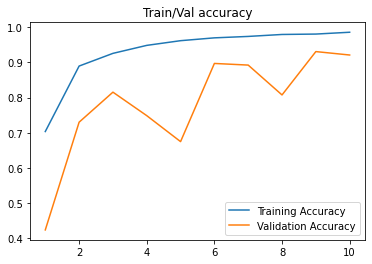

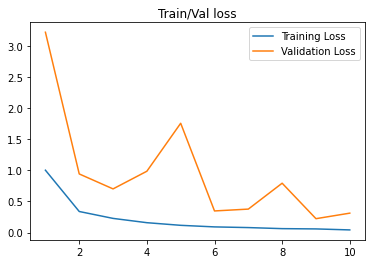

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#get number of epochs in list
epochs = list(range(1,len(acc)+1))

plt.plot(epochs,acc, label = 'Training Accuracy')
plt.plot(epochs,val_acc, label = 'Validation Accuracy')
plt.title('Train/Val accuracy')
plt.legend()

#create new figure
plt.figure()

plt.plot(epochs,loss, label = 'Training Loss')
plt.plot(epochs,val_loss, label = 'Validation Loss')
plt.title('Train/Val loss')
plt.legend()